In [55]:
!pip install folium
!pip install squarify
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -------------- ------------------------- 5.8/16.2 MB 29.3 MB/s eta 0:00:01
   --------------------------------- ------ 13.4/16.2 MB 32.3 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 31.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 38.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 96.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
df.isnull().any(

time               False
latitude           False
longitude          False
depth              False
mag                False
magType            False
nst                 True
gap                 True
dmin                True
rms                False
net                False
id                 False
updated            False
place               True
type               False
horizontalError     True
depthError         False
magError            True
magNst              True
status             False
locationSource     False
magSource          False
dtype: bool

In [2]:
df = pd.read_csv("earthquakes_2023_global.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [3]:
#Checking for null values

df.isnull().sum().sort_values(ascending=False)

dmin               1866
magError           1672
place              1608
magNst             1577
horizontalError    1549
gap                1417
nst                1415
time                  0
locationSource        0
status                0
depthError            0
type                  0
id                    0
updated               0
latitude              0
net                   0
rms                   0
magType               0
mag                   0
depth                 0
longitude             0
magSource             0
dtype: int64

In [6]:
#Dropping rows with missing values

df = df.dropna(subset=['latitude', 'longitude', 'mag', 'depth'])
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [18]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['updated'] = pd.to_datetime(df['updated'], errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magError,magNst,status,locationSource,magSource,year,month,day,mag_category,region
0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,0.097,14.0,reviewed,us,us,2023,1,1,Minor,Alaska
1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,0.083,43.0,reviewed,us,us,2023,1,1,Light,Philippines
2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,0.090,16.0,reviewed,pr,pr,2023,1,1,Minor,NaN
3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,0.238,5.0,reviewed,us,us,2023,1,1,Light,Indonesia
4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,0.085,18.0,reviewed,us,us,2023,1,1,Minor,Alaska


In [30]:
def classify_magnitude(mag):
    if mag < 3.0:
        return 'Micro'
    elif mag < 4.0:
        return 'Minor'
    elif mag < 5.0:
        return 'Light'
    elif mag < 6.0:
        return 'Moderate'
    elif mag < 7.0:
        return 'Strong'
    elif mag < 8.0:
        return 'Major'
    else:
        return 'Great'

df['mag_category'] = df['mag'].apply(classify_magnitude)

df['mag_category']

0           Minor
1           Light
2           Minor
3           Light
4           Minor
           ...   
26637    Moderate
26638    Moderate
26639    Moderate
26640       Light
26641    Moderate
Name: mag_category, Length: 26599, dtype: object

In [13]:
df['region'] = df['place'].str.extract(r',\s*([^,]+)$')  # crude extraction of region after comma


In [14]:
df = df[df['depth'] >= 0]
df = df[df['mag'] >= 0]


[Text(0.5, 1.0, 'Magnitude Distribution')]

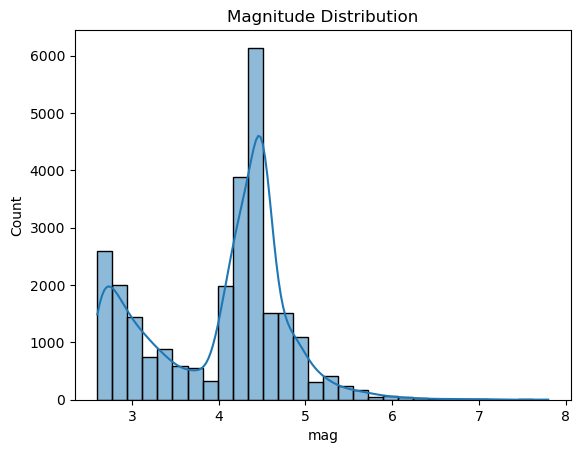

In [17]:
import seaborn as sns
sns.histplot(df['mag'], bins=30, kde=True).set(title='Magnitude Distribution')


<Axes: title={'center': 'Top 10 Earthquake Regions'}, ylabel='region'>

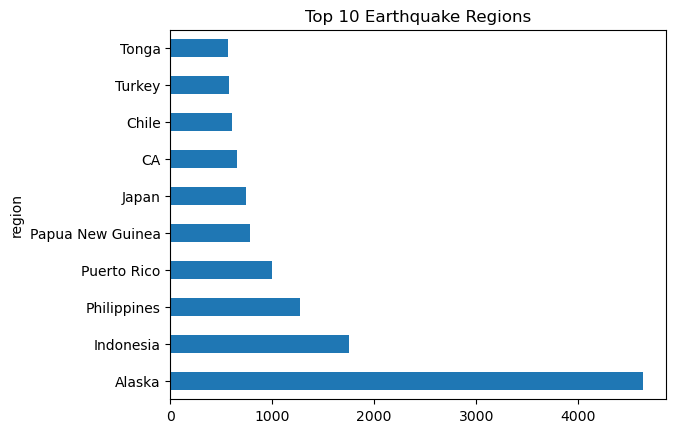

In [20]:
df['region'].value_counts().head(10).plot(kind='barh', title='Top 10 Earthquake Regions')


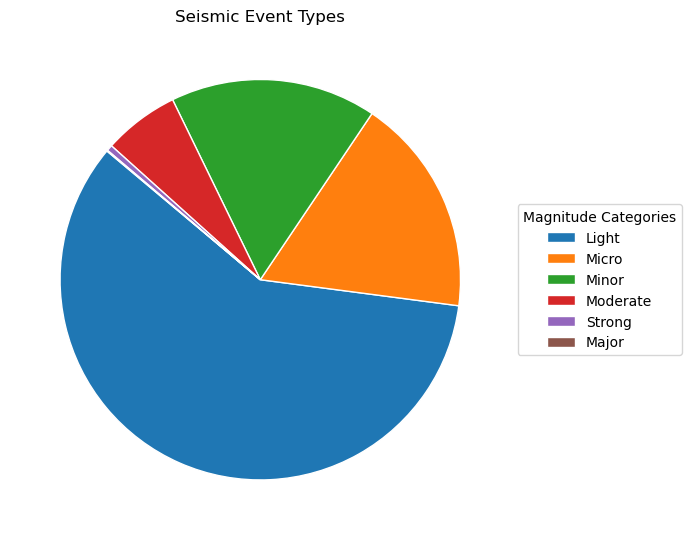

In [48]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(7, 7))

# Plot pie without percentages
df['mag_category'].value_counts().plot(
    kind='pie',
    labels=None,  # Removes labels on the pie
    startangle=140,
    title='Seismic Event Types',
    wedgeprops={'edgecolor': 'white'},
    legend=False
)

# Add legend separately
plt.legend(
    labels=df['mag_category'].value_counts().index,
    title="Magnitude Categories",
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# Remove y-label
plt.ylabel('')

plt.tight_layout()
plt.show()


[Text(0.5, 1.0, 'RMS (Amplitude Spectrum) Distribution')]

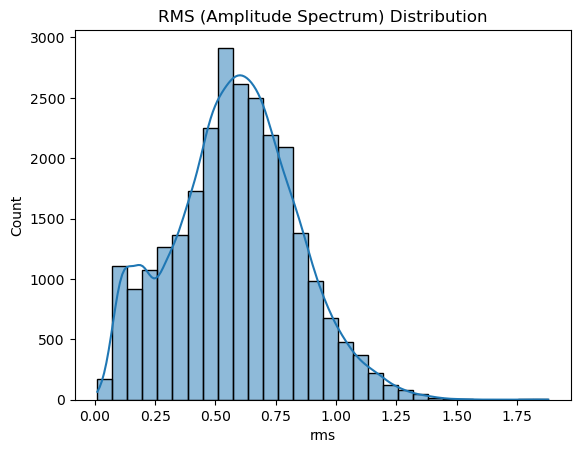

In [23]:
sns.histplot(df['rms'], bins=30, kde=True).set(title='RMS (Amplitude Spectrum) Distribution')


In [59]:
import folium
import geopandas as gpd

# Load the Tectonic Plates GeoJSON
tectonic_plates = gpd.read_file("PB2002_plates.json")

# Create a folium map centered around the globe (adjust zoom for your needs)
m = folium.Map(location=[0, 0], zoom_start=2)

# Add tectonic plates to the map
folium.GeoJson(tectonic_plates).add_to(m)

# Plot the earthquakes on top of the map
for _, row in df.sample(1000).iterrows():  # Sample 1000 for speed
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['mag'] * 1.5,
        popup=f"{row['place']} - Mag: {row['mag']}",
        color='crimson',
        fill=True
    ).add_to(m)

# Save the map to an HTML file
m.save("seismic_map_with_plates.html")


In [61]:
from IPython.display import IFrame
IFrame('seismic_map_with_plates.html', width=1000, height=600)


<Axes: title={'center': 'Earthquakes per Month'}, xlabel='month'>

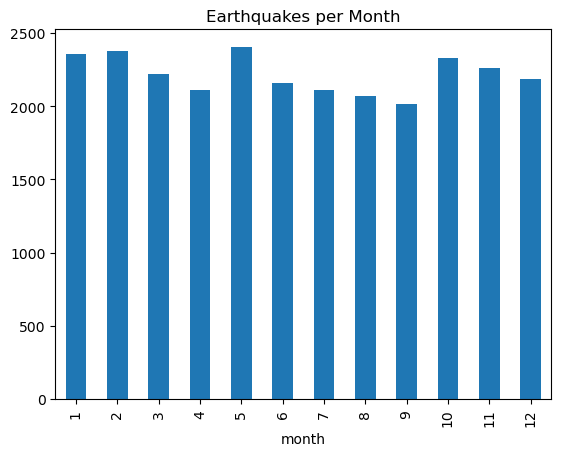

In [27]:
df['month'].value_counts().sort_index().plot(kind='bar', title='Earthquakes per Month')
